In [96]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import spacy
from spacy.matcher import Matcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from collections import Counter

In [124]:
reviews = pd.read_csv('yelp_kimos.csv')

In [116]:
reviews = reviews[:-1]
reviews.columns

Index(['Date', 'Rating', 'Review', 'User name', 'UserLocation', 'AVG Rating',
       'review_new', 'review_score', 'polarity', 'subjectivity',
       'Negative Terms', 'Positive Terms', 'Aspect Terms', 'Ngrams'],
      dtype='object')

In [125]:
reviews

,Date,Rating,Review,User name,UserLocation,AVG Rating
0,9/28/2017,4.0 star rating,I really liked their menu set up. Fresh fish ...,Amy E.,"Fremont, CA",4.0 star rating
1,9/19/2017,5.0 star rating,Went for dinner on our 1st night in Maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating
2,9/17/2017,3.0 star rating,Beautiful beachfront restaurant in Lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating
3,8/31/2017,5.0 star rating,One of my My favorite restaurants in Maui wit...,Amber V.,"Las Vegas, NV",4.0 star rating
4,9/22/2017,4.0 star rating,"After lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating
...,...,...,...,...,...,...
2075,10/28/2008,4.0 star rating,"Okay so I used to work here, I'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating
2076,9/17/2009,5.0 star rating,For our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating
2077,2/18/2009,4.0 star rating,Kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating
2078,10/14/2007,5.0 star rating,Lunch. Fish sandwich - Kimo's style (not spic...,Kanani P.,"San Francisco, CA",4.0 star rating


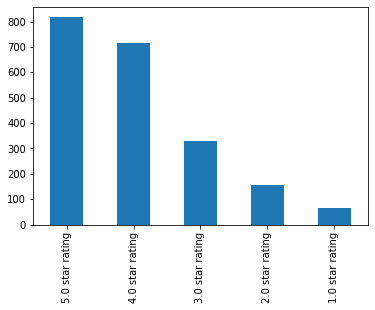

In [22]:
reviews['Rating'].value_counts().plot(kind='bar');

In [122]:
reviews['Review'] = reviews['Review'].astype(str)

In [26]:
reviews['Review'].head()

0    I  really liked their menu set up. Fresh fish ...
1    Went for dinner on our 1st night in Maui..my s...
2    Beautiful beachfront restaurant in Lahaina tow...
3    One of my My favorite restaurants in Maui  wit...
4    After lunch, we wanted to go people watch on t...
Name: Review, dtype: object

In [27]:
#Lowercasing all the review content to make data normalised and keep words in uniform manner
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [28]:
reviews['Review'].head()

0    i really liked their menu set up. fresh fish s...
1    went for dinner on our 1st night in maui..my s...
2    beautiful beachfront restaurant in lahaina tow...
3    one of my my favorite restaurants in maui with...
4    after lunch, we wanted to go people watch on t...
Name: Review, dtype: object

In [29]:
#removing special characters: Since these special characters create their own tokens and hence not usefull in any kind of 
#algorithm
reviews['review_new'] = reviews['Review'].str.replace('[^\w\s]','')

In [30]:
reviews['review_new']

0       i really liked their menu set up fresh fish se...
1       went for dinner on our 1st night in mauimy son...
2       beautiful beachfront restaurant in lahaina tow...
3       one of my my favorite restaurants in maui with...
4       after lunch we wanted to go people watch on th...
                              ...                        
2074    after a long drive to hana and back kimos was ...
2075    okay so i used to work here im completely bias...
2076    for our first family trip to the neighbor isla...
2077    kimos has one of the best spots to watch the s...
2078    lunch fish sandwich  kimos style not spicy caj...
Name: review_new, Length: 2079, dtype: object

In [31]:
#removing stopwords from the reviews, because there words have no predictive power in reality
# for example: i, me, myself
stop = stopwords.words('english')
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [32]:
reviews['review_new']

0       really liked menu set fresh fish selection cha...
1       went dinner 1st night mauimy son 15 loves cook...
2       beautiful beachfront restaurant lahaina town b...
3       one favorite restaurants maui view food die ob...
4       lunch wanted go people watch boardwalk later g...
                              ...                        
2074    long drive hana back kimos recommended us owne...
2075    okay used work im completely biased eaten ever...
2076    first family trip neighbor island maui place m...
2077    kimos one best spots watch sunset lounge area ...
2078    lunch fish sandwich kimos style spicy cajun st...
Name: review_new, Length: 2079, dtype: object

In [37]:
#Stemming: helps to gain relevant information as it reduces all words with the same roots to a 
#common form by removing suffixes such as -action, ing, -es and -ses.
#BUT  there can be problematic where there are spelling errors.
st = PorterStemmer()
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#LEMMATIZING: creates a common word reducing the use of tenses which likely removes suffixes
lem = WordNetLemmatizer()
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join([lem.lemmatize(word) for word in x.split()]))


In [121]:
reviews

,Date,Rating,Review,User name,UserLocation,AVG Rating,review_new,review_score,polarity,subjectivity,Negative Terms,Positive Terms,Aspect Terms,Ngrams
0,9/28/2017,4.0 star rating,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,realli like menu set fresh fish select chang d...,"(0.21590909090909097, 0.6107142857142858)",0.215909,0.610714,[hate],"[fresh, great, sweet]","[realli, menu, fish, tasti, singer, guitar, re...","[speak server, speak server pack, hate hate, f..."
1,9/19/2017,NaN,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimi son 15 love cook ...,"(0.6333333333333333, 0.4333333333333333)",0.633333,0.433333,[],[best],"[dinner, love, cook, alway, fish, caper, sauc,...","[go dinner, good fish, good fish caper, eat ev..."
2,9/17/2017,NaN,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beauti beachfront restaur lahaina town beauti ...,"(0.14487179487179486, 0.5762820512820513)",0.144872,0.576282,[wrong],"[thank, good, popular, share, enjoy, sweet]","[town, tabl, view, food, sister, place, ring, ...","[dine tabl, chef creation, chef creation hula,..."
3,8/31/2017,NaN,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorit restaur maui view food die obviou ...,"(0.10454545454545455, 0.47500000000000003)",0.104545,0.475000,"[die, die]","[want, fresh, recommend]","[food, fish, steak, fish, thing, pork, rib, ro...","[know steak, take view, listen wave, listen wa..."
4,9/22/2017,NaN,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch want go peopl watch boardwalk later grab...,"(0.31428571428571433, 0.376984126984127)",0.314286,0.376984,[],"[want, great, sure, love]","[lunch, peopl, watch, drink, pavaillion, face,...","[go peopl, go peopl watch, love check, love ch..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,7/17/2011,NaN,came here for dinner one night and had a wonde...,Amanda C.,"Cupertino, CA",4.0 star rating,came dinner one night wonder experi right get ...,"(0.26911976911976915, 0.5817460317460318)",0.269120,0.581746,[],[],"[dinner, night, seat, bread, roll, carrot, pop...","[come dinner, get seat, understand pop, explai..."
2073,10/4/2009,NaN,came here for lunch while visiting old town la...,Lori A.,"Daly City, CA",4.0 star rating,came lunch visit old town lahaina put much mon...,"(0.16875, 0.3375)",0.168750,0.337500,[disappoint],[good],"[lunch, town, money, park, lot, meter, spot, k...","[come lunch, nee spot, nee spot kill, old town..."
2074,9/29/2008,NaN,"after a long drive to hana and back, kimo's wa...",Anthony T.,"San Jose, CA",4.0 star rating,long drive hana back kimo recommend u owner lo...,"(0.17857142857142858, 0.37171717171717167)",0.178571,0.371717,[],"[nice, sure]","[owner, shop, place, minut, wait, seat, bar, s...","[get place, find seat, find seat bar, take car..."
2075,10/28/2008,NaN,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay use work im complet bia eaten everyth men...,"(0.5343915343915344, 0.4856261022927689)",0.534392,0.485626,"[complain, drop, neglect]","[fresh, better, sure, best, great, best, love,...","[use, work, complet, scoop, place, vegetarian,...","[be complet, joint steak, fresh fish, qualiti ..."


In [35]:
def sentiment(x):
    return TextBlob(x).sentiment  

reviews['review_score'] = reviews['review_new'].apply(sentiment)
#the first score is sentiment polarity which tells if the sentiment is positive or negative 
#and the second score is subjectivity score to tell how subjective is the text
reviews

,Date,Rating,Review,User name,UserLocation,AVG Rating,review_new,review_score
0,9/28/2017,4.0 star rating,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,realli like menu set fresh fish select chang d...,"(0.21590909090909097, 0.6107142857142858)"
1,9/19/2017,5.0 star rating,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimi son 15 love cook ...,"(0.6333333333333333, 0.4333333333333333)"
2,9/17/2017,3.0 star rating,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beauti beachfront restaur lahaina town beauti ...,"(0.14487179487179486, 0.5762820512820513)"
3,8/31/2017,5.0 star rating,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorit restaur maui view food die obvious...,"(0.10454545454545455, 0.47500000000000003)"
4,9/22/2017,4.0 star rating,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch want go peopl watch boardwalk later grab...,"(0.31428571428571433, 0.376984126984127)"
...,...,...,...,...,...,...,...,...
2074,9/29/2008,3.0 star rating,"after a long drive to hana and back, kimo's wa...",Anthony T.,"San Jose, CA",4.0 star rating,long drive hana back kimo recommend us owner l...,"(0.17857142857142858, 0.37171717171717167)"
2075,10/28/2008,4.0 star rating,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay use work im complet bias eaten everyth me...,"(0.5343915343915344, 0.4856261022927689)"
2076,9/17/2009,5.0 star rating,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first famili trip neighbor island maui place m...,"(0.27329545454545456, 0.50625)"
2077,2/18/2009,4.0 star rating,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimo one best spot watch sunset loung area cre...,"(0.27272727272727276, 0.36515151515151517)"


In [42]:
reviews[['polarity', 'subjectivity']] = pd.DataFrame(reviews['review_score'].tolist(), index=reviews.index) 

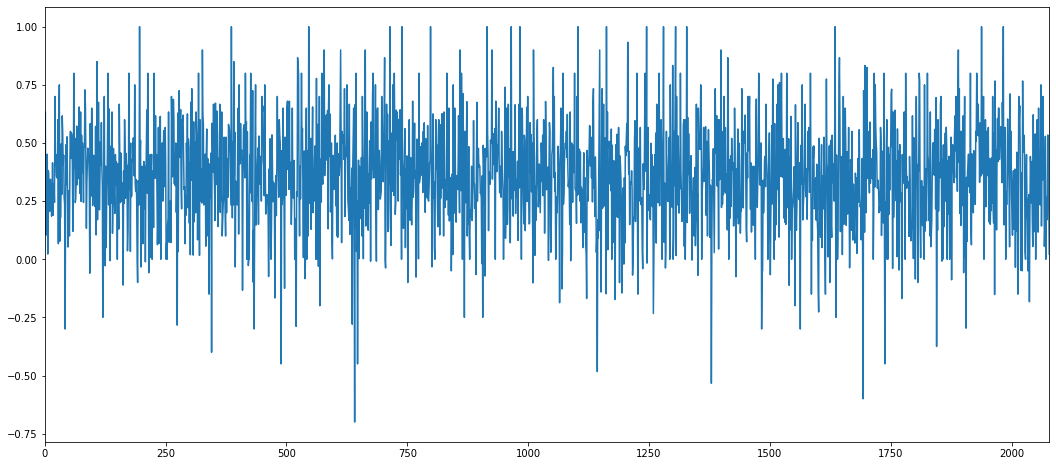

In [43]:
reviews['polarity'].plot(figsize=(18,8));

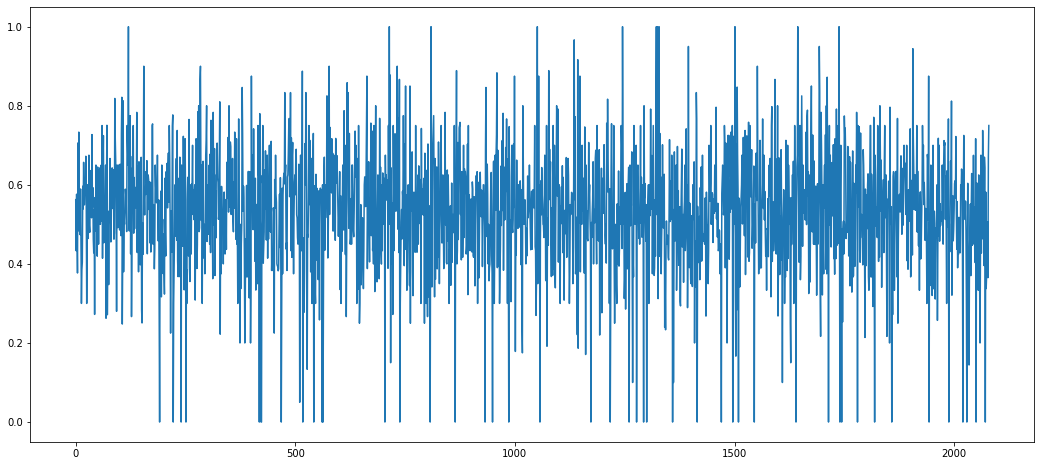

In [127]:
reviews['subjectivity'].plot(figsize=(18,8));

In [47]:
nlp = spacy.load("en_core_web_sm")
analyser = SentimentIntensityAnalyzer()

In [57]:
def neg_terms(x):
    neg_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') > pol.get('pos'):
                    neg_wrd.append(tok.text)
    return neg_wrd
                    
reviews['Negative Terms'] = reviews['review_new'].apply(neg_terms)            

In [58]:
reviews['Negative Terms']

0                          [hate]
1                              []
2                         [wrong]
3                      [die, die]
4                              []
                  ...            
2074                           []
2075    [complain, drop, neglect]
2076                        [bad]
2077                        [bad]
2078                           []
Name: Negative Terms, Length: 2079, dtype: object

In [59]:
def pos_terms(x):
    pos_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') < pol.get('pos'):
                    pos_wrd.append(tok.text)
    return pos_wrd
                    
reviews['Positive Terms'] = reviews['review_new'].apply(pos_terms)

In [60]:
reviews['Positive Terms']

0                                   [fresh, great, sweet]
1                                                  [best]
2             [thank, good, popular, share, enjoy, sweet]
3                                [want, fresh, recommend]
4                               [want, great, sure, love]
                              ...                        
2074                                         [nice, sure]
2075    [fresh, better, sure, best, great, best, love,...
2076                              [recommend, love, good]
2077                                         [best, good]
2078                                             [better]
Name: Positive Terms, Length: 2079, dtype: object

In [65]:
asp_ss = []
def asp_terms(x):
    asp_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'NOUN' or tok.pos_ == 'PRONOUN':
                    asp_wrd.append(tok.text)
                    asp_ss.append(tok.text)
    return asp_wrd
                    
reviews['Aspect Terms'] = reviews['review_new'].apply(asp_terms)

In [62]:
reviews['Aspect Terms']

0       [realli, menu, fish, tasti, singer, guitar, re...
1       [dinner, love, cook, alway, fish, caper, sauc,...
2       [town, tabl, view, food, sister, place, ring, ...
3       [food, fish, steak, fish, thing, pork, rib, ro...
4       [lunch, peopl, watch, drink, pavaillion, face,...
                              ...                        
2074    [owner, shop, place, minut, wait, seat, bar, s...
2075    [use, work, complet, scoop, place, vegetarian,...
2076    [place, ocean, band, love, style, parent, week...
2077    [spot, watch, drink, pretti, ambianc, gripe, p...
2078           [lunch, style, list, menu, style, problem]
Name: Aspect Terms, Length: 2079, dtype: object

In [63]:
reviews

,Date,Rating,Review,User name,UserLocation,AVG Rating,review_new,review_score,polarity,subjectivity,Negative Terms,Positive Terms,Aspect Terms
0,9/28/2017,4.0 star rating,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,realli like menu set fresh fish select chang d...,"(0.21590909090909097, 0.6107142857142858)",0.215909,0.610714,[hate],"[fresh, great, sweet]","[realli, menu, fish, tasti, singer, guitar, re..."
1,9/19/2017,5.0 star rating,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimi son 15 love cook ...,"(0.6333333333333333, 0.4333333333333333)",0.633333,0.433333,[],[best],"[dinner, love, cook, alway, fish, caper, sauc,..."
2,9/17/2017,3.0 star rating,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beauti beachfront restaur lahaina town beauti ...,"(0.14487179487179486, 0.5762820512820513)",0.144872,0.576282,[wrong],"[thank, good, popular, share, enjoy, sweet]","[town, tabl, view, food, sister, place, ring, ..."
3,8/31/2017,5.0 star rating,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorit restaur maui view food die obviou ...,"(0.10454545454545455, 0.47500000000000003)",0.104545,0.475000,"[die, die]","[want, fresh, recommend]","[food, fish, steak, fish, thing, pork, rib, ro..."
4,9/22/2017,4.0 star rating,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch want go peopl watch boardwalk later grab...,"(0.31428571428571433, 0.376984126984127)",0.314286,0.376984,[],"[want, great, sure, love]","[lunch, peopl, watch, drink, pavaillion, face,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,9/29/2008,3.0 star rating,"after a long drive to hana and back, kimo's wa...",Anthony T.,"San Jose, CA",4.0 star rating,long drive hana back kimo recommend u owner lo...,"(0.17857142857142858, 0.37171717171717167)",0.178571,0.371717,[],"[nice, sure]","[owner, shop, place, minut, wait, seat, bar, s..."
2075,10/28/2008,4.0 star rating,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay use work im complet bia eaten everyth men...,"(0.5343915343915344, 0.4856261022927689)",0.534392,0.485626,"[complain, drop, neglect]","[fresh, better, sure, best, great, best, love,...","[use, work, complet, scoop, place, vegetarian,..."
2076,9/17/2009,5.0 star rating,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first famili trip neighbor island maui place m...,"(0.27329545454545456, 0.50625)",0.273295,0.506250,[bad],"[recommend, love, good]","[place, ocean, band, love, style, parent, week..."
2077,2/18/2009,4.0 star rating,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimo one best spot watch sunset loung area cre...,"(0.27272727272727276, 0.36515151515151517)",0.272727,0.365152,[bad],"[best, good]","[spot, watch, drink, pretti, ambianc, gripe, p..."


In [77]:
fdist = FreqDist(asp_ss)
topterms = fdist.most_common(50)

In [76]:
# concatenating the top terms from the list to be passed onto the wordcloud
term_str = ' '
for a, c in topterms:
    term_str = term_str + a + ' '

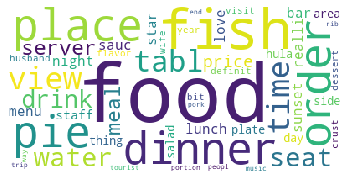

In [78]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300
                         ).generate(term_str)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [91]:
ngrams_wc = []
def sp_pattern(x):
    ngrams_ss = []
    n_g = []
    n_g1 = []
    n_g2 = []
    n_g3 = []
    n_g4 = []
    n_g5 = []
    matcher = Matcher(nlp.vocab)
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        pattern = [
                {'POS': 'VERB'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern1 = [
                {'POS': 'ADJ'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern2 = [
                {'DEP': 'ROOT', 'OP': '?'},
                {'POS': 'ADJ'}, 
                {'POS': 'PROPN'},
                ]

        pattern3 = [
                {'POS': 'ADJ'}, 
                {'POS': 'VERB'},
                ]

        pattern4 = [
                {'POS': 'PROPN', 'OP': '?'}, 
                {'POS': 'NOUN'},
                {'POS': 'ADJ'},
                ]

        pattern5 = [ 
                {'POS': 'VERB'},
                {'POS': 'PROPN'},
                ]
        
        matcher.add('PATTERN', None, pattern)

        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                n_g.append(ngrams.lemma_)
                ngrams_ss.append(ngrams.lemma_)
                ngrams_wc.append(ngrams.lemma_)
 
        matcher.add('PATTERN1', None, pattern1)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g:
                    n_g1.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)

        matcher.add('PATTERN2', None, pattern2)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1:
                    n_g2.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN3', None, pattern3)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2:
                    n_g3.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN4', None, pattern4)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3:
                    n_g4.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN5', None, pattern5)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3 and ngrams.lemma_ not in n_g4:
                    n_g5.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
    
    return ngrams_ss

In [92]:
reviews['Ngrams'] = reviews['review_new'].apply(sp_pattern)

In [93]:
reviews

,Date,Rating,Review,User name,UserLocation,AVG Rating,review_new,review_score,polarity,subjectivity,Negative Terms,Positive Terms,Aspect Terms,Ngrams
0,9/28/2017,4.0 star rating,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,realli like menu set fresh fish select chang d...,"(0.21590909090909097, 0.6107142857142858)",0.215909,0.610714,[hate],"[fresh, great, sweet]","[realli, menu, fish, tasti, singer, guitar, re...","[speak server, speak server pack, hate hate, f..."
1,9/19/2017,5.0 star rating,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimi son 15 love cook ...,"(0.6333333333333333, 0.4333333333333333)",0.633333,0.433333,[],[best],"[dinner, love, cook, alway, fish, caper, sauc,...","[go dinner, good fish, good fish caper, eat ev..."
2,9/17/2017,3.0 star rating,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beauti beachfront restaur lahaina town beauti ...,"(0.14487179487179486, 0.5762820512820513)",0.144872,0.576282,[wrong],"[thank, good, popular, share, enjoy, sweet]","[town, tabl, view, food, sister, place, ring, ...","[dine tabl, chef creation, chef creation hula,..."
3,8/31/2017,5.0 star rating,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorit restaur maui view food die obviou ...,"(0.10454545454545455, 0.47500000000000003)",0.104545,0.475000,"[die, die]","[want, fresh, recommend]","[food, fish, steak, fish, thing, pork, rib, ro...","[know steak, take view, listen wave, listen wa..."
4,9/22/2017,4.0 star rating,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch want go peopl watch boardwalk later grab...,"(0.31428571428571433, 0.376984126984127)",0.314286,0.376984,[],"[want, great, sure, love]","[lunch, peopl, watch, drink, pavaillion, face,...","[go peopl, go peopl watch, love check, love ch..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,9/29/2008,3.0 star rating,"after a long drive to hana and back, kimo's wa...",Anthony T.,"San Jose, CA",4.0 star rating,long drive hana back kimo recommend u owner lo...,"(0.17857142857142858, 0.37171717171717167)",0.178571,0.371717,[],"[nice, sure]","[owner, shop, place, minut, wait, seat, bar, s...","[get place, find seat, find seat bar, take car..."
2075,10/28/2008,4.0 star rating,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay use work im complet bia eaten everyth men...,"(0.5343915343915344, 0.4856261022927689)",0.534392,0.485626,"[complain, drop, neglect]","[fresh, better, sure, best, great, best, love,...","[use, work, complet, scoop, place, vegetarian,...","[be complet, joint steak, fresh fish, qualiti ..."
2076,9/17/2009,5.0 star rating,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first famili trip neighbor island maui place m...,"(0.27329545454545456, 0.50625)",0.273295,0.506250,[bad],"[recommend, love, good]","[place, ocean, band, love, style, parent, week...","[recommend place, recommend place someon, live..."
2077,2/18/2009,4.0 star rating,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimo one best spot watch sunset loung area cre...,"(0.27272727272727276, 0.36515151515151517)",0.272727,0.365152,[bad],"[best, good]","[spot, watch, drink, pretti, ambianc, gripe, p...","[drink empti, good spot, good spot watch, good..."


In [100]:
fdist = FreqDist(ngrams_wc)
topterms = fdist.most_common(50)

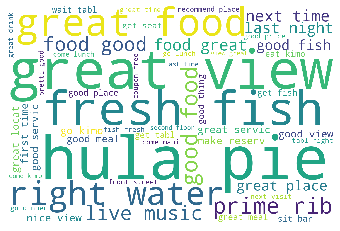

In [104]:
mylist = []
for a,c in topterms:
    mylist.append(a)

wordc=Counter(mylist)

wordcloud = WordCloud(stopwords=STOPWORDS, width = 1500, height = 1000,
                          background_color='white', 
                      max_words=300
                         ).generate_from_frequencies(wordc)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [114]:
lrated = []

st += reviews['Ngrams'].apply(lambda x: ",".join([word for word in x]))
st                                

0        speak server,speak server pack,hate hate,fres...
1           go dinner,good fish,good fish caper,eat everi
2        dine tabl,chef creation,chef creation hula,ne...
3        know steak,take view,listen wave,listen wave ...
4        go peopl,go peopl watch,love check,love check...
                              ...                        
2074     get place,find seat,find seat bar,take care,d...
2075     be complet,joint steak,fresh fish,qualiti foo...
2076     recommend place,recommend place someon,live b...
2077     drink empti,good spot,good spot watch,good am...
2078           say problem,well realli,ask waiterwaitress
Name: Ngrams, Length: 2079, dtype: object